<a href="https://colab.research.google.com/github/ParkerH98/DS2-Group/blob/main/Graph_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time to get all runtimes: 3032.6477580070496
hello


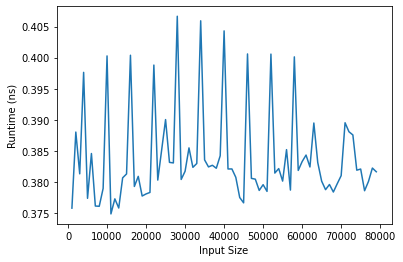

In [13]:
import csv

import matplotlib.pyplot as plt
import numpy as np

def readCSV(filename):
     '''Returns : a list of entries.
     Params : name of csv file'''
     l = list()
     # opening the CSV file
     with open(filename,encoding="utf-8", mode ='r') as file:   

          # reading the CSV file
          csvFile = csv.DictReader(file)

          print(csvFile)
          l = [line for line in csvFile]

     return l

def writeCSV(filename,data):
     '''save the data in .csv file
     Params : filename of the csv file
     data is list of dictionaries of each entry'''
     fields = list(data[0].keys())
     rows = [list(elem.values()) for elem in data]
     # writing to csv file 
     with open(filename, 'w') as csvfile: 
         # creating a csv writer object 
         csvwriter = csv.writer(csvfile) 
             
         # writing the fields 
         csvwriter.writerow(fields) 
             
         # writing the data rows 
         csvwriter.writerows(rows)

"""def modifyList(list1):
     def modify(item):
          item['Price'] = float(item['Price'].split(' ')[0])
          item['Quantity'] = int(item['Quantity'])
          del item['Action']
          del item['Market']
          return item"""

     

def modifyList(list1):
     def modify(item):
          #print(item)
          pr = item['Price'].split(' ')
          price = float(pr[0].replace(',',''))
          if(pr[1]=='GALA'):
               price = price*0.03748
          elif(pr[1]=='ETH'):
               price = price*1309.97
          elif(pr[1]=='WETH'):
               price = price*1322.16
          elif(pr[1]=='ASH'):
               price = price*0.9406
          elif(pr[1]=='TATR'):
               price = price*0.0102056
          elif(pr[1]=='USDC'):
               price = price*1.0
          elif(pr[1]=='MANA'):
               price = price*0.64205
          elif(pr[1]=='SAND'):
               price = price*0.7919
          elif(pr[1]=='RARI'):
               price = price*2.18
          elif(pr[1]=='CTZN'):
               price = price*0.00321
          elif(pr[1]=='APE'):
               price = price*4.62
          else :
               price = price
          item['Price'] = price
          item['Quantity'] = int(item['Quantity'])
          del item['Action']
          del item['Market']
          del item['File_Name']
          return item
     l = [modify(item) for item in list1]
     return l

def groupByTokenID(list1):
     '''Group the entries by Token ID and calculate average price of each token
     Returns : list of grouped data
     Params : list of entries'''
     def add(dic, elem):
          tid = elem['Token ID']
          if tid not in dic:
               dic[tid] = elem
          else:
               elem_old = dic[tid]
               total = elem_old['Quantity']*elem_old['Price'] + elem['Price']
               elem_old['Quantity'] = elem_old['Quantity'] + elem['Quantity']
               elem_old['Price'] = total / elem_old['Quantity']
               dic[tid] = elem_old

          return dic

     dic = dict()
     for elem in list1:
          dic = add(dic,elem)

     return list(dic.values())



def printItem(item):
     #print the keys and values of a single entry
     msg = ""
     for k,v in item.items():
          msg = msg + ", "+str(k)+":"+str(v)
     print(msg)

def merge(list1, list2, attr, isAsc):
     ans = []
     i = 0
     j = 0
     while(i<len(list1) and j<len(list2)):
          if isAsc:
               if(list1[i][attr]<=list2[j][attr]):
                    ans.append(list1[i])
                    i = i + 1
               else:
                    ans.append(list2[j])
                    j = j + 1
          else:
               if(list1[i][attr]>=list2[j][attr]):
                    ans.append(list1[i])
                    i = i + 1
               else:
                    ans.append(list2[j])
                    j = j + 1

     while(i<len(list1)):
          ans.append(list1[i])
          i = i + 1

     while(j<len(list2)):
          ans.append(list2[j])
          j = j + 1

     return ans

# merge sort implemented for sorting
def mergeSort(arr,attr,isAsc = True):
     if(len(arr)==1): # base case : returns the array if one element
          return arr

     # divide the array into two equal parts
     mid = int(len(arr)/2)
     list1 = arr[:mid]
     list2 = arr[mid:]

     # sort each sub array using recursion
     list1 = mergeSort(list1,attr,isAsc)
     list2 = mergeSort(list2,attr,isAsc)

     # merge two sorted sub arrays
     merged_arr = merge(list1, list2, attr,isAsc)

     return merged_arr

#read the csv file
tran_list = readCSV("nft_dataset.txt")

# modify some attributes like Price and Quantity
tran_list = modifyList(tran_list)

#query 1
tonek_list = groupByTokenID(tran_list)

avg_price_sorted_list = mergeSort(tonek_list,'Price',isAsc = False)
"""for elem in avg_price_sorted_list :
     printItem(elem)"""
writeCSV("query1_output.csv",avg_price_sorted_list)




""" For grouping data iteration is used i.e., O(N).
For sorting merge sort is implemented i.e., O(NlogN).
So in each query, group the data in O(N) time and sort the data in O(NlogN) time complexity.
Hence the time complexity of each query = O(N) + O(NlogN) = O(NlogN)"""

import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

#average time query 1 (over 1000 query 1)
def gather_runtimes(num_runs):
    runtime_start = time.time()
    runtimes = multi_run_query(num_runs)
    runtime_end = time.time()
    print("time to get all runtimes: " + str(runtime_end-runtime_start))

    
    runtimes = pd.DataFrame(runtimes, columns=['Avg Runtime'])
    runtimes.to_csv('avg_runtimes.csv', index = False)
    # using generated csv in excel to make a plot
runtimes = []   
def multi_run_query(num_runs):
    
    for input_size in range(1000,80000, 1000):
        average_runtime = 0
        
        for i in range(num_runs):
            start = time.time()
            tonek_list = groupByTokenID(tran_list)
            avg_price_sorted_list = mergeSort(tonek_list,'Price',isAsc = False)
            end = time.time()
            average_runtime += (end-start)
            # average_runtime = average_runtime * 10**9
           # random.shuffle(final_buyer_list)
        average_runtime /= num_runs
       # print("Input: " + str(len(final_buyer_list[:input_size])) + " Avg Time (secs): " + str(average_runtime))
        
        runtimes.append(average_runtime)
    return runtimes

input_intervals = np.arange(1000,80000, 1000)

# runs the dataset with various sizes & outputs the results in a csv
gather_runtimes(100)
    
plt.plot(input_intervals, runtimes)
plt.xlabel("Input Size")
plt.ylabel("Runtime (ns)")
print("hello")
plt.show()